# COSC2002 Assignment 1

**470416103**<br>
**480550367**

# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

A ***World*** has:
 - A side length
 - A map generated with size side_length * side_length

In [2]:
class World:
    def __init__(self, side_length = 40):
        self.side_length = side_length
        self.map = np.zeros([side_length, side_length], dtype = 'object')
        for y in range(side_length):
            for x in range(side_length):
                house = House(x, y)
                self.map[y][x] = house
        self.people_list = []
                
    def get_side_length(self):
        return self.side_length
    
    def get_map(self):
        return self.map   

A ***House*** has:
 - A list of inhabitants (humans and zombies)
 - An x coordinate
 - A y coordinate

In [3]:
class House:
    def __init__(self, x, y):
        self.people = []
        self.x = x
        self.y = y
        
    def contents(self):
        return self.people

A ***Person*** has:
 - An x coordinate
 - A y coordinate
 - A property to tell if a person is infected
 - A property to tell if a person has been infected before
 - A method that allows a person to move on the map

In [4]:
class Person:
    def __init__(self, x, y, infected = False, has_been_infected = False):
        self.x = x
        self.y = y
        self.infected = infected
        self.has_been_infected = False
        self.moves = ["n", "ne", "e", "se", "s", "sw", "w", "nw", "na"]

    def getx(self):
        return self.x
        
    def gety(self):
        return self.y
    
    def is_zombie(self):
        if self.infected == True:
            return True
        return False
    
    def n(self, world):
        if self.gety() == 0:
            world.map[world.side_length-1][self.getx()].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.y = world.side_length - 1
        else:
            world.map[self.gety()-1][self.getx()].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.y = self.gety() - 1
                
    def e(self, world):
        if self.getx() == world.side_length - 1:
            world.map[self.gety()][0].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.x = 0
        else:
            world.map[self.gety()][self.getx()+1].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.x = self.getx() + 1
    
    def s(self, world):
        if self.gety() == world.side_length - 1:
            world.map[0][self.getx()].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.y = 0
        else:
            world.map[self.gety()+1][self.getx()].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.y = self.gety() + 1
        
    def w(self, world):
        if self.getx() == 0:
            world.map[self.gety()][world.side_length - 1].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.x = world.side_length - 1
        else:
            world.map[self.gety()][self.getx()-1].contents().append(self)
            world.map[self.gety()][self.getx()].contents().remove(self)
            self.x = self.getx() -1
        
    def move(self, world):
        move = np.random.choice(self.moves)
        
        if move == "na":
            pass
        
        elif move == "n":
            self.n(world)
   
        elif move == "ne":
            self.n(world)
            self.e(world)
        
        elif move == "e":
            self.e(world)
                
        elif move == "se":
            self.s(world)
            self.e(world)
        
        elif move == "s":
            self.s(world)
            
        elif move == "sw":
            self.s(world)
            self.w(world)
        
        elif move == "w":
            self.w(world)
            
        elif move == "nw":
            self.n(world)
            self.w(world)

A ***Simulation*** has:
 - A method to start the simulation
 - A method to generate a scatter plot
 - A method to calculate how many people have been turned into zombies
 - A method to display the grid

In [5]:
class Simulation:
    def __init__(self, days = 1000, people = 100, remission = 0, side_length = 40):
        self.days = days
        self.people = people
        self.remission = remission
        self.world = World(side_length)
        self.currentDay = 0
        self.all_turned = False
        self.z_day = None
        self.zombie_population = np.zeros(days)
        self.infection_rate = np.zeros(days)
        self.daily_infected = np.zeros(days) #number of people becoming infected per day
        self.zombie_counter = 0
        
    def generate_start(self): #this funtion intitialises the person distribution and randomly distributes 1 zombie
        world = self.world.get_map()
        for i in range(self.people-1):
            person = Person(np.random.choice(self.world.get_side_length(), 1)[0], np.random.choice(self.world.get_side_length(), 1)[0])
            world[person.gety()][person.getx()].contents().append(person)
            self.world.people_list.append(person)
    
        zombie = Person(np.random.choice(self.world.get_side_length(), 1)[0], np.random.choice(self.world.get_side_length(), 1)[0], infected = True)
        world[zombie.gety()][zombie.getx()].contents().append(zombie)     
        self.world.people_list.append(zombie)
        
    def next(self, num_days = 1): #performs calculations and actions for incrementing a day
        for i in range(num_days):
            for row in self.world.map:
                for house in row:
                    cond = False #if there is at least 1 zombie in the house
                    for person in house.contents():
                        if person.is_zombie():
                            cond = True
                    if cond:
                        for person in house.contents():
                            if person.is_zombie() == False:
                                person.infected = True
                                self.daily_infected[self.currentDay] += 1
                                
                    for person in house.contents(): #spontaneously return to being human
                        if person.is_zombie():
                            come_back_to_LIFE = np.random.choice([True, False], size = None, p = [self.remission, 1 - self.remission])
                            if come_back_to_LIFE == True:
                                person.infected = False
                                self.daily_infected[self.currentDay] -= 1
                                
            for person in self.world.people_list:
                person.move(self.world)
   
            if self.all_turned == False: #keeps track of the day when the last human becomes infected
                if self.calculate_pop() == self.people:
                    self.all_turned = True
                    self.z_day = self.currentDay
                else:
                    self.all_turned = False 
            self.currentDay += 1
        
          
    def gen_scatter(self): #generates a scatter plot representation of the world
        for person in self.world.people_list:
            if person.is_zombie() == True:
                plt.scatter(person.getx(), person.gety(), c = 'g', alpha = 0.5)
            else:
                plt.scatter(person.getx(), person.gety(), c = 'b', alpha = 0.5)
        plt.xlim(0, self.world.get_side_length())
        plt.ylim(0, self.world.get_side_length())
        plt.title('World Side Length = {}'.format(self.world.get_side_length()))
        plt.xlabel('Side X')
        plt.ylabel('Side Y')
        plt.show()
        
    def calculate_pop(self): #returns the number of zombies in the world at the current time
        self.zombie_counter = 0
        for person in self.world.people_list:
            if person.is_zombie():
                self.zombie_counter += 1
        return self.zombie_counter
        
    def show(self): #print representation of the grid
        for row in self.world.map: 
            temp = []
            for house in row:
                temp_list = []
                if len(house.contents()) == 0:
                    temp_list.append('-')
                for person in house.contents():
                    if person.is_zombie() == True:
                        temp_list.append('Z')
                    elif person.is_zombie() == False:
                        temp_list.append('H')
                temp_list = ''.join(temp_list)
                temp.append(temp_list)
            temp = ' '.join(temp)
            print(temp)

In [6]:
#intialise 10 simulation runs

simulations = []

for i in range(10): #each simulation
    sim = Simulation(1000, 100, 0, 40)
    sim.generate_start()
    for j in range(1000): #each day in each simulation
        sim.zombie_population[j] = sim.calculate_pop()
        sim.next(1)
    simulations.append(sim)

## (1.1) 
*What is the average length of time until the last human gets infected? Provide also an estimate of the uncertainty in your value.*

In [7]:
z_day_list = []

for sim in simulations:
    z_day_list.append(sim.z_day)
    
z_day_average = np.mean(z_day_list)

print("For 10 simulations, the average number of days until last human becomes infected is {}".format(z_day_average))
print("This value changes based on the simulation generation. We can estimate the actual value at +- approximately 15 days.")

For 10 simulations, the average number of days until last human becomes infected is 318.8
This value changes based on the simulation generation. We can estimate the actual value at +- approximately 15 days.


## (1.2)
*Averaging over many runs, plot the number of zombies as a function of time.*

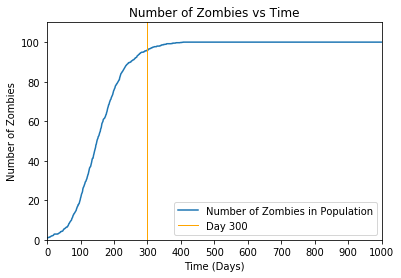

In [8]:
zombie_pop = np.zeros(1000)

for sim in simulations:
    for i in range(1000):
        zombie_pop[i] += sim.zombie_population[i]
        
zombie_pop = zombie_pop / 10  
    
plt.plot(zombie_pop, label = "Number of Zombies in Population")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Zombies")
plt.title("Number of Zombies vs Time")
plt.axvline(x = 300, linewidth = 1, color = 'orange', label = "Day 300")
plt.xticks(np.arange(0, 1001, step = 100))
plt.ylim(0, 110)
plt.legend()
plt.xlim(0, 1001)
plt.show()

## (1.3) 
*Averaging over many runs, plot the number of infections per day (the infection rate) as a function of the fraction of zombies in the population.*

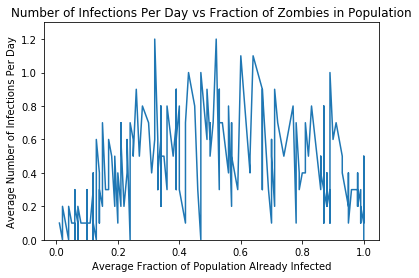

In [9]:
infection_rates = np.zeros(1000)
infection_fractions = np.zeros(1000)

for sim in simulations:
    for i in range(1000):
        infection_rates[i] += sim.daily_infected[i]
        infection_fractions[i] = (sim.zombie_population[i]/100) * 10

infection_rates = infection_rates/10 #average new zombies per day of simulation
infection_fractions = infection_fractions/10

plt.plot(infection_fractions, infection_rates)
plt.ylabel("Average Number of Infections Per Day")
plt.xlabel("Average Fraction of Population Already Infected")
plt.title("Number of Infections Per Day vs Fraction of Zombies in Population")
plt.ylim(0, 1.3)
plt.show()

### (1.4)
*Given your results in (1.3), postulate a discrete map for the zombie fraction (Z), i.e. Z(n+1) = f(Zn, tn)*

Since the plot in 1.3 is parabolic in nature, we can posulate a parabolic discrete map formula:<br>

***<center>y = a(x - h)^2 + k<center>***<br>


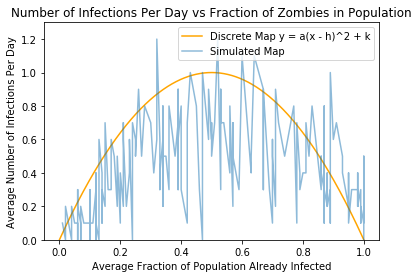

In [10]:
x = np.linspace(0.0, 1.0, 1000)
y = np.zeros(1000)

for i in range(1000):
    y[i] = -4*(x[i]-0.5)**2 + 1

plt.plot(x, y, color = 'orange', fillstyle = "full", label = "Discrete Map y = a(x - h)^2 + k")
plt.plot(infection_fractions, infection_rates, label = "Simulated Map", alpha = 0.5)
plt.ylabel("Average Number of Infections Per Day")
plt.xlabel("Average Fraction of Population Already Infected")
plt.title("Number of Infections Per Day vs Fraction of Zombies in Population")
plt.ylim(0, 1.3)
plt.legend()
plt.show()

## (1.5) 
*If you halve the size of the world (i.e, set side_length = 20), how does this change the time it takes until the last human is infected? Briefly discuss the real-world implications of this result.*

In [11]:
#running a new set of simulations with half the side length

simulations2 = []

for i in range(10): #each simulation
    sim = Simulation(1000, 100, 0, 20)
    sim.generate_start()
    for j in range(1000): #each day in each simulation
        sim.zombie_population[j] = sim.calculate_pop()
        sim.next(1)
    simulations2.append(sim)

In [12]:
#calculate average day until final infection

z_day_list2 = []

for sim in simulations2:
    z_day_list2.append(sim.z_day)
    
z_day_average2 = np.mean(z_day_list2)
    
print("For 10 simulations and side_length = 20, the average number of days until last human becomes infected is {}".format(z_day_average2))

For 10 simulations and side_length = 20, the average number of days until last human becomes infected is 68.6


As seen above in 1.5, the average time it takes to infect the last human (around 70 days) in a grid of 20 by 20 is around 4 to 5 times faster than in 1.1 (around 300 days) with a grid size of 40 by 40. <br>

This shows that spreadable dieseases or infections that exist in a smaller or more densely populated area such as a crowded hostpital or overflowing prisons will spread at a much faster rate than in open or sparsely populated areas.

## (1.6)

*Using the original size of the world (sidelength = 40), change the spontaneous zombie remission rate from 0 to 0.01 (i.e., every 100 days on average a given zombie will spontaneously return to being human).<br>*

*Discuss the new dynamics of the model, with reference to steady states
and/or equilibrium points (if you wish, you can also include a graph of the number of zombies over time to illustrate your point).<br>*

*Be careful to identify all possible types of behaviour (a “type” being a qualitatively distinct behaviour).*

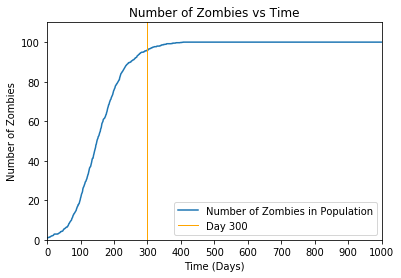

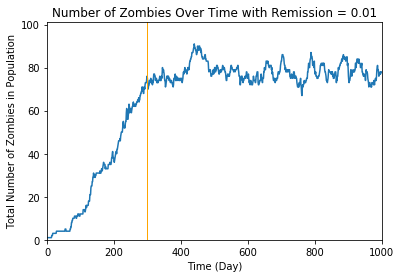

In [13]:
#generate one simulation with a remission rate of 0.01

rem_sim = Simulation(1000, 100, 0.01, 40)
rem_sim.generate_start()
rem_pop = np.zeros(1000)

for i in range(1000):
    rem_sim.zombie_population[i] = rem_sim.calculate_pop()
    rem_sim.next(1)
    rem_pop[i] += rem_sim.zombie_population[i]
    
#showing original zombie population vs time
    
plt.plot(zombie_pop, label = "Number of Zombies in Population")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Zombies")
plt.title("Number of Zombies vs Time")
plt.axvline(x = 300, linewidth = 1, color = 'orange', label = "Day 300")
plt.xticks(np.arange(0, 1001, step = 100))
plt.ylim(0, 110)
plt.legend()
plt.xlim(0, 1001)
plt.show()

#running zombie population vs time with remission = 0.01

plt.plot(rem_pop)
plt.title("Number of Zombies Over Time with Remission = 0.01")
plt.axvline(x = 300, linewidth = 1, color = 'orange', label = "Day 300")
plt.xlabel("Time (Day)")
plt.ylabel("Total Number of Zombies in Population")
plt.ylim(0,101)
plt.xlim(0, 1001)
plt.show()

A steady state means that the map property does not change with time. <br>

When simulating with a remission rate of 0.01, the change in zombies over time becomes very different to the simulation without remission.<br> 

Here, we can observe that as the time increases, the rate of people turning into zombies slowly starts to reaches a constant peak around day 300 much like the previous experiment. After this point, the graph begins to fluctuate between around 70 to 90 zombies in the total population, but never flattens out like the previous graph. <br>

Instead, the simulation with remission never produces a smooth curve after reaching its peak. The remission rate causes the amount of zombies to flucuate constantly, so that the graph never reaches a constant value as time passes.

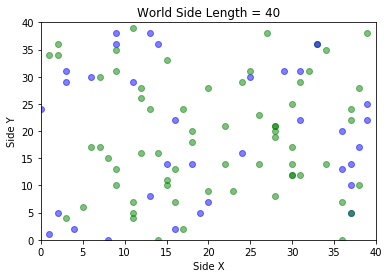

In [14]:
sim = Simulation(1000, 100, 0.01, 40) 
sim.generate_start() 
sim.next(350)
sim.gen_scatter()

If we take an experiment using a remission of 0.01, not all humans have been infected after 350 days, unlike the simulations run without the remission property where all humans had been infected by this time.<br>

The remission in these simulations effectivly models the presence of vaccines or cures to dieseases in the real world. If these exist, the spread of a virus can be slowed down tremendously.

# Question 2

A ***Bus*** has:
 - An identifying number, from 1 to Tn/10 number of buses
 - An arrival time in minutes out of the total simulation time Tn
 - *Passengers* that have boarded the bus

In [15]:
class Bus:
    def __init__(self, number, arrival_time):
        self.number = number
        self.passengers = []
        self.arrival_time = arrival_time
        
    def get_number(self): #each bus has a number from 1 to n number of buses in the simulation
        return self.number
    
    def get_passengers(self): #returns the passengers that have boarded this bus
        return self.passengers
    
    def get_arrival_time(self): #each bus has a different arrival time at the bus stop depending on the model
        return self.arrival_time

A ***Bus Stop*** has:
 - *Buses* which have currently stopped at the bus stop
 - *Passengers* which are currently waiting for a bus at the bus stop

In [16]:
class Bus_Stop:
    def __init__(self):
        self.current_buses = []
        self.passengers = []
    
    def get_passengers(self): #returns the passengers waiting at this bus stop
        return self.passengers
    
    def get_buses(self): #returns the buses stopped at this bus stop
        return self.current_buses

A ***Passenger*** has:
 - An arrival time at a *bus stop*
 - A wait time, the total number of minutes the passenger has been waiting to get on a *bus* since they arrived at the *bus stop*
 - The ability to board a *bus*
 - A *bus* that they have boarded

In [17]:
class Passenger:
    def __init__(self, arrival_time):
        self.wait_time = 0
        self.arrival_time = arrival_time
        self.bus = None
        
    def get_arrival_time(self): #arrival time at the bus stop
        return self.arrival_time
    
    def get_wait_time(self): #total waiting time after arriving before boarding a bus
        return self.wait_time
    
    def wait(self, minutes = 1): #passenger waits 'minutes' number of minutes
        self.wait_time += minutes
        
    def board_bus(self, bus): #passenger gets on a bus
        self.bus = bus
        bus.get_passengers().append(self)

A ***Model*** has:
 - A list of all the *buses* in the simulation
 - A list of all the *passengers* in the simulation
 - The current time stamp of the simulation in minutes
 - A total time in minutes that the model takes place over
 - A model number, which determines the arrival time distribution and offset of *buses* in the simulation
 - An x value, used for model 2
 - A σ value, used for model 3
 - A single *bus stop* to use for the simulation
 - A list of the bus earliness offsets in minutes, analysed in part 2.3
 
A model generates the appropriate model type, number of buses, number of passengers and bus arrival distribution based on the intialisation inputs.



In [18]:
class Model:
    def __init__(self, total_time, model_number, x = 5, sigma = 4, custom_offset = None):
        self.buses = []
        self.passengers = []
        self.time = 0
        self.bus_stop = Bus_Stop()
        self.x = x
        self.sigma = sigma
        self.late_times = [] #bus arrival offsets from scheduled times for analysis in part 2.3, for model 2 and 3
        
        schedule = np.arange(0, total_time, step = 10) #buses are scheduled to arrive every 10 minutes
        
        if model_number == 1: #model 1
            for i in range(1, int(total_time/10) + 1): #generate Tn / 10 buses
                bus = Bus(i, np.random.choice(total_time)) #random arrival time between 0 and Tn
                self.buses.append(bus)
            
        elif model_number == 2: #model 2 
            for i in range(1, int(total_time/10)): #generate Tn / 10 buses
                offset = np.random.uniform(-x, x + 0.01) #arrival time is random offset -x or +x+1 (since randint is not inclusive on second bound)
                self.late_times.append(offset)
                bus = Bus(i, int(schedule[i-1] + offset))
                self.buses.append(bus)
                
        elif model_number == 3: #model 3
             #buses are scheduled to arrive every 10 minutes
            for i in range(1, int(total_time/10)): #generate Tn / 10 buses
                dn = np.random.normal(loc = 0, scale = sigma, size = None) #dn is a random normal distribution choice using sigma input as scale
                self.late_times.append(dn)
                bus = Bus(i, int(schedule[i-1] + dn)) #arrival time is scheduled time +- dn
                self.buses.append(bus)
                
        else:
            print("Invalid model number.")
            sys.exit(1)
            
        for i in range(0, 10*len(self.buses)): #generate 10 * number of buses
            passenger = Passenger(np.random.choice(total_time)) #passengers have a random arrival time between 0 and Tn
            self.passengers.append(passenger)
    
    def get_stop(self):
        return self.bus_stop
            
    def step(self):      
        self.get_stop().get_buses().clear() #old buses leave with passengers aboard
                       
        for passenger in self.passengers: #new passengers arrive
            if passenger.get_arrival_time() == self.time:
                self.get_stop().get_passengers().append(passenger)
                       
        for bus in self.buses: #new buses arrive
            if bus.get_arrival_time() == self.time:
                self.get_stop().get_buses().append(bus)
                                    
        if len(self.get_stop().get_buses()) == 0: #if there are no buses at the bus stop currently, the passengers cannot board anything and wait 1 time step (1 minute)
            for passenger in self.get_stop().get_passengers():
                passenger.wait(1)
        else:             
            for passenger in self.get_stop().get_passengers(): #current passengers board any buses currently stopped and leave the bus stop, they choose the first available bus if there is more than 1 stopped
                passenger.board_bus(self.get_stop().get_buses()[0])
            self.get_stop().get_passengers().clear()
        
        self.time += 1 #increment simulation time by 1 minute



## (2.1) 

*For each model, carry out the following:*

**(i)** *Confirm that the average interval between buses in each case is 10 minutes;*<br>
**(ii)** *Determine the average waiting time for people;*<br>
**(iii)** *Plot a histogram of the interval between bus arrivals;*<br>
**(iv)** *Identify the nature of the distribution of bus intervals for each model.*<br>

In [19]:
### Model Initialisation ###

total_time = 1440 #24 hour simulation

#run all simulations for 24 hours

model_1 = Model(total_time, 1, 0, 0)
for i in range(total_time):
    model_1.step()
    
model_2 = Model(total_time, 2, 5, 0) #x = 5
for i in range(total_time):
    model_2.step()
    
model_3 = Model(total_time, 3, 0, 4) #sigma = 4
for i in range(total_time):
    model_3.step()

#### Model 1

(i) Average interval between bus arrivals: 9.62 minutes
(ii) Average waiting time for passengers: 9.47 minutes
(iii)


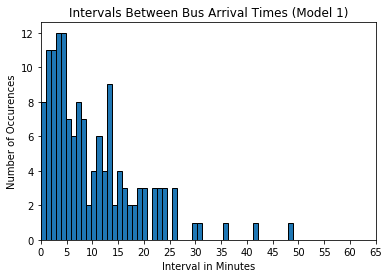

In [20]:
# (i)

bus_times = []

for bus in model_1.buses:
    bus_times.append(bus.get_arrival_time())
    
bus_times.sort()
bus_interval = np.sum(np.diff(bus_times)) / len(model_1.buses)

print("(i) Average interval between bus arrivals: {} minutes".format(round(bus_interval, 2)))

# (ii)

wait_times = []

for passenger in model_1.passengers:
    wait_times.append(passenger.get_wait_time())
        
wait_times.sort()
passenger_interval = np.sum(wait_times) / len(model_1.passengers)

print("(ii) Average waiting time for passengers: {} minutes".format(round(passenger_interval, 2)))

# (iii)

print("(iii)")
intervals = np.diff(bus_times)
plt.hist(intervals, edgecolor = 'black', linewidth = 1, bins = 50)
plt.xlabel("Interval in Minutes")
plt.ylabel("Number of Occurences")
plt.title("Intervals Between Bus Arrival Times (Model 1)")
plt.xticks(np.arange(0, 76, step = 5))
plt.xlim(0, 65)
plt.show()

**(iv)** Using this model, most of the intervals are in the 0 to 10 minute mark, however the longest interval that can occur is just under 40 minutess. The distribution is right skewed as there are less interval occurences on the right side of the histogram. The interval range of this model is much greater than model 2 and model 3.



#### Model 2

(i) Average interval between bus arrivals: 9.95 minutes
(ii) Average waiting time for passengers: 5.38 minutes
(iii)


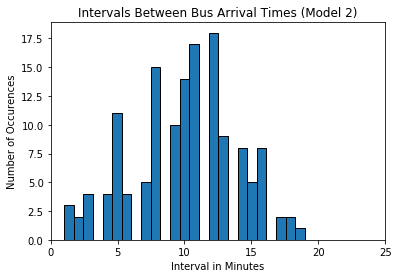

In [21]:
# (i)

bus_times2 = []

for bus in model_2.buses:
    bus_times2.append(bus.get_arrival_time())
    
bus_times2.sort()
bus_interval2 = np.sum(np.diff(bus_times2)) / len(model_2.buses)

print("(i) Average interval between bus arrivals: {} minutes".format(round(bus_interval2, 2)))

# (ii)

wait_times2 = []

for passenger in model_2.passengers:
    wait_times2.append(passenger.get_wait_time())
        
wait_times2.sort()
passenger_interval2 = np.sum(wait_times2) / len(model_2.passengers)

print("(ii) Average waiting time for passengers: {} minutes".format(round(passenger_interval2, 2)))

# (iii)

print("(iii)")
intervals2 = np.diff(bus_times2)
plt.hist(intervals2, edgecolor = 'black', linewidth = 1, bins = 25)
plt.xlabel("Interval in Minutes")
plt.ylabel("Number of Occurences")
plt.title("Intervals Between Bus Arrival Times (Model 2)")
plt.xticks(np.arange(0, 76, step = 5))
plt.xlim(0,25)
plt.show()

**(iv)** Model 2 has a slight symmetric distribution. Intervals with the most occurences occur from the 5 to 15 minute marks. The longest interval time is just under 20 minutes. The most common interval time is just under 10 minutes. Compared to model 1, the average waiting time for a bus is much shorter.

#### Model 3

(i) Average interval between bus arrivals: 9.93 minutes
(ii) Average waiting time for passengers: 6.05 minutes
(iii)


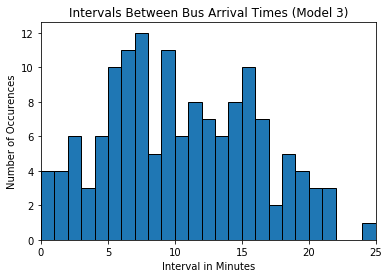

In [22]:
# (i)

bus_times3 = []

for bus in model_3.buses:
    bus_times3.append(bus.get_arrival_time())
    
bus_times3.sort()
bus_interval3 = np.sum(np.diff(bus_times3)) / len(model_3.buses)

print("(i) Average interval between bus arrivals: {} minutes".format(round(bus_interval3, 2)))

# (ii)

wait_times3 = []

for passenger in model_3.passengers:
    wait_times3.append(passenger.get_wait_time())

wait_times3.sort()

passenger_interval3 = np.sum(wait_times3) / len(model_3.passengers)

print("(ii) Average waiting time for passengers: {} minutes".format(round(passenger_interval3, 2)))

# (iii)

print("(iii)")
intervals3 = np.diff(bus_times3)
plt.hist(intervals3, edgecolor = 'black', linewidth = 1, bins = 25)
plt.xlabel("Interval in Minutes")
plt.ylabel("Number of Occurences")
plt.title("Intervals Between Bus Arrival Times (Model 3)")
plt.xticks(np.arange(0, 76, step = 5))
plt.xlim(0, 25)
plt.show()

**(iv)** In model 3, the interval distribution favours the 5 to 15 minute marks and appears to be slightly symmetric. Passengers wait no longer than approximately 20 minutes for a bus. The distribution and interval range is similar to model 2. The most common interval time is approximately 10 minutes.<br>
For all models, the average time between bus arrivals is indeed around 10 minutes.


## (2.2)

*How does the estimate of average wait time depend on x (for Model 2) and σ (for Model 3)? How do the distributions of bus intervals change with these parameters?*<br>

For model 2 we can take 3 simualtions with increasing values of x:

For x = 1:
Average passenger wait time: 4.49 minutes


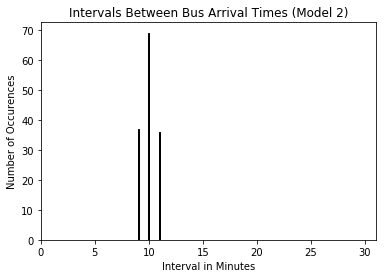

For x = 5:
Average passenger wait time: 5.67 minutes


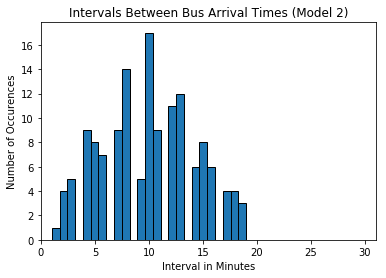

For x = 10:
Average passenger wait time: 6.52 minutes


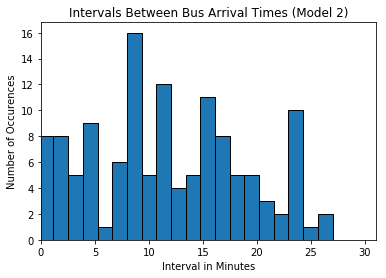

In [23]:
model_2_sims = []
model_2_sims.append(Model(total_time, 2, 1, 0)) #x = 1
model_2_sims.append(Model(total_time, 2, 5, 0)) #x = 5
model_2_sims.append(Model(total_time, 2, 10, 0)) #x = 10

for i in range(0, len(model_2_sims)):
    model = model_2_sims[i]
    
    for i in range(total_time):
        model.step()
    
    waits = []
    for passenger in model.passengers:
        waits.append(passenger.get_wait_time())
    waits.sort()
    passenger_waits = np.sum(waits) / len(model.passengers)
    
    print("For x = {}:".format(model.x))
    print("Average passenger wait time: {} minutes".format(round(passenger_waits, 2)))
    
    arrival_times = []
    for bus in model.buses:
        arrival_times.append(bus.get_arrival_time())
    bus_intervals = np.diff(arrival_times)
    
    plt.hist(bus_intervals, edgecolor = 'black', linewidth = 1, bins = 25)
    plt.xlabel("Interval in Minutes")
    plt.ylabel("Number of Occurences")
    plt.title("Intervals Between Bus Arrival Times (Model 2)")
    plt.xlim(0, 31)    
    plt.show()

At low values of x, the average passenger wait times are much lower, and the interval distribution is tightly packed around 10 minutes. At larger x values, wait times become longer and the interval times become more dispersed. The distribution moves from symmetric, to uniform.

For model 3 we can also take 3 simulations with increasing values for σ:



For σ = 1:
Average passenger wait time: 4.68 minutes


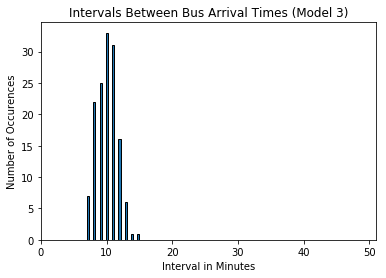

For σ = 4:
Average passenger wait time: 5.88 minutes


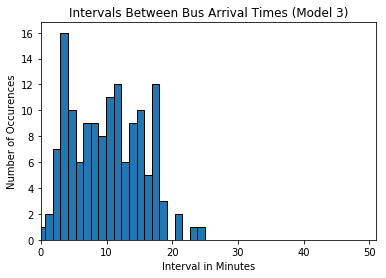

For σ = 10:
Average passenger wait time: 7.77 minutes


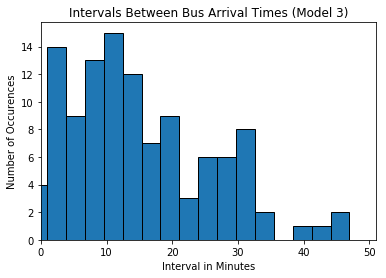

In [24]:
model_3_sims = []
model_3_sims.append(Model(total_time, 3, 5, 1)) #sigma = 1
model_3_sims.append(Model(total_time, 3, 5, 4)) #sigma = 4
model_3_sims.append(Model(total_time, 3, 5, 10))#sigma = 10

for i in range(0, len(model_3_sims)):
    model = model_3_sims[i]
    
    for i in range(total_time):
        model.step()
    
    waits = []
    for passenger in model.passengers:
        waits.append(passenger.get_wait_time())
    waits.sort()
    passenger_waits = np.sum(waits) / len(model.passengers)
    
    print("For σ = {}:".format(model.sigma))
    print("Average passenger wait time: {} minutes".format(round(passenger_waits, 2)))
    
    arrival_times = []
    for bus in model.buses:
        arrival_times.append(bus.get_arrival_time())
    bus_intervals = np.diff(arrival_times)
    
    plt.hist(bus_intervals, edgecolor = 'black', linewidth = 1, bins = 25)
    plt.xlabel("Interval in Minutes")
    plt.ylabel("Number of Occurences")
    plt.title("Intervals Between Bus Arrival Times (Model 3)")
    plt.xlim(0, 51)    
    plt.show()

Changing σ has a very similar effect to changing x. Smaller values have shorter average passenger wait times and tighter distribution. Larger values disperse the distribution and give longer average wait times.



## (2.3)

*Real-world bus data is available on Canvas, “Route 1 minutes late.csv” and “Route 2 minutes late.csv”.
These files contain a list of times for buses compared to their scheduled arrival times. A negative
number means the bus was late.*

**(i)** *Read in the data an plot histograms of the minutes late for each route;*<br>
**(ii)** *Compare the data to predictions from your simulations. Which model seems to be the best fit for real-world data?*



In [25]:
route1 = list(csv.reader(open('Route_1_minutes_late.csv')))
route2 = list(csv.reader(open('Route_2_minutes_late.csv')))

**(i)** Here we simply read in the CSV data and plot corresponding histograms.



In [26]:
# (i)

#read csv data into arrays and sort, minute values rounded to 2 decimal places

route1_times = []
route2_times = []

for line in route1:
    route1_times.append(round(float(line[0]), 2))

for line in route2:
    route2_times.append(round(float(line[0]), 2))

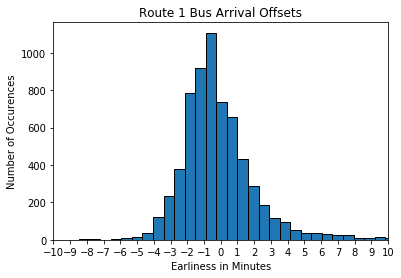

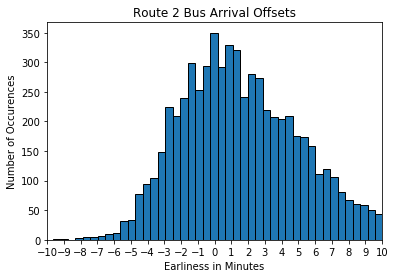

In [27]:
#route 1 histogram
plt.hist(route1_times, edgecolor = 'black', linewidth = 1, bins = 250)
plt.title("Route 1 Bus Arrival Offsets")
plt.xlabel("Earliness in Minutes")
plt.ylabel("Number of Occurences")
plt.xlim(-10, 10)
plt.xticks(np.arange(-10, 11, step = 1))
plt.show()

#route 2 histogram
plt.hist(route2_times, edgecolor = 'black', linewidth = 1, bins = 250)
plt.title("Route 2 Bus Arrival Offsets")
plt.xlabel("Earliness in Minutes")
plt.ylabel("Number of Occurences")
plt.xlim(-10, 10)
plt.xticks(np.arange(-10, 11, step = 1))
plt.show()

**(ii)** Since the CSV data only gives us the minute offset in earliness, we should extract the corresponding data in our simulations:



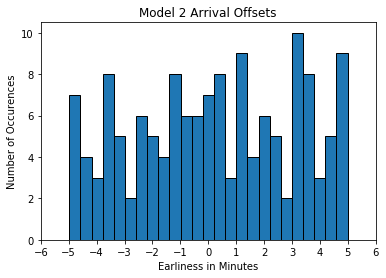

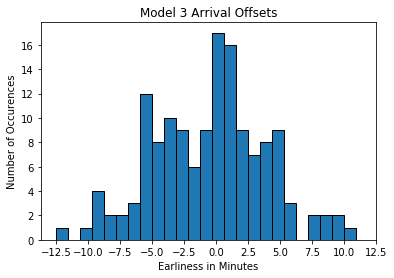

In [28]:
# (ii)

#model 2 earliness
plt.hist(model_2.late_times, edgecolor = 'black', linewidth = 1, bins = 25)
plt.title("Model 2 Arrival Offsets")
plt.xlabel("Earliness in Minutes")
plt.ylabel("Number of Occurences")
plt.xticks(np.arange(-6, 7, step = 1))
plt.show()

#model 3 earliness
plt.hist(model_3.late_times, edgecolor = 'black', linewidth = 1, bins = 25)
plt.title("Model 3 Arrival Offsets")
plt.xlabel("Earliness in Minutes")
plt.ylabel("Number of Occurences")
plt.xticks(np.arange(-12.5, 15, step = 2.5))
plt.show()

We can see that model 2 still shows a slightly uniform distribution in the offset times. On the other hand, model 3 carries a more symmetric distribution with a slight left skew. Of the two, model 3 clearly follows the real-world data much more closely in its dsitribution. It has a peak around the -2.5 to 2.5 minute mark and disperses as the minutes increase, much like the histograms of the CSV data in part (i).



### (2.4)

*What can you conclude about the wait time for passengers? From the timetable, is it expected to be 5 minutes? From your simulations, and comparision with real-world data, is this reasonable, or can we expect a different wait time?*

For both of the simulations using model 2 and model 3 where we applied x = 5 and σ = 4 respectively, the resulting average passenger wait time was approximately 5 minutes as shown in 2.1. We can say that the methods used in model 3 simulate real waiting times quite effectively.<br>

Observing the histograms generated with the real-world data, we can see that most of the interval occurences occur in the -5 to 5 minute range. We can accordingly expect passenger wait times for this data to also be around 5 minutes, as the distribution is mostly symmetrical in this range.

Conclusively, model 3 simulates passenger wait times and bus interval times reasonably accurately when compared with the provided data. We have seen that model 1 and 2 fail to provide an accurate distribution of bus arrival offset times. We have seen that increasing parameters such as x and σ in models 2 and 3 tends to increase passenger wait times, disperse the distribution of bus arrival times and increase the possible range of arrival times in minutes.